In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv("df.csv")

In [24]:
df.head()

,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,NaN,M,59
2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   order_date      1000 non-null   object 
 2   product_id      1000 non-null   int64  
 3   category_id     1000 non-null   int64  
 4   category_name   1000 non-null   object 
 5   product_name    1000 non-null   object 
 6   quantity        1000 non-null   int64  
 7   price           1000 non-null   float64
 8   payment_method  1000 non-null   object 
 9   city            1000 non-null   object 
 10  review_score    799 non-null    float64
 11  gender          897 non-null    object 
 12  age             1000 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 101.7+ KB


In [26]:
df.isnull().sum()

customer_id         0
order_date          0
product_id          0
category_id         0
category_name       0
product_name        0
quantity            0
price               0
payment_method      0
city                0
review_score      201
gender            103
age                 0
dtype: int64

In [27]:
df = df.dropna()

In [28]:
df.isnull().sum()

customer_id       0
order_date        0
product_id        0
category_id       0
category_name     0
product_name      0
quantity          0
price             0
payment_method    0
city              0
review_score      0
gender            0
age               0
dtype: int64

In [29]:
# converting datetime 
import warnings
warnings.filterwarnings("ignore")
df["order_date"] = pd.to_datetime(df["order_date"])

In [30]:
df["order_date"].info()

<class 'pandas.core.series.Series'>
Index: 721 entries, 0 to 999
Series name: order_date
Non-Null Count  Dtype         
--------------  -----         
721 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.3 KB


In [31]:
# kategorik sutunların analizi (kaç farklı veri var !!!)
df["category_name"].value_counts()

category_name
Electronics           156
Sports & Outdoors     147
Fashion               146
Home & Living         141
Books & Stationery    131
Name: count, dtype: int64

In [32]:
df["product_name"].value_counts()

product_name
Smartphone       35
Yoga Mat         35
Pants            35
Laptop           33
T-shirt          33
Blanket          33
Soccer Ball      32
Eraser           31
Headphones       31
Pen              29
Tent             29
Notebook         29
Smartwatch       29
Tablet           28
Painting         28
Skirt            28
Carpet           27
Vase             27
Dress            26
Running Shoes    26
Pillow           26
Basketball       25
Shirt            24
Story Book       24
Novel            18
Name: count, dtype: int64

In [33]:
df["payment_method"].value_counts()

payment_method
Cash on Delivery    274
Bank Transfer       227
Credit Card         220
Name: count, dtype: int64

In [34]:
df["gender"].value_counts()

gender
M    365
F    356
Name: count, dtype: int64

### Bazı Temel İstatiksel veriler

product_name
Laptop           113
T-shirt          112
Smartphone       112
Yoga Mat          98
Soccer Ball       96
Pants             95
Blanket           93
Headphones        89
Tablet            88
Vase              87
Tent              86
Skirt             85
Pillow            84
Eraser            82
Running Shoes     81
Notebook          81
Smartwatch        79
Story Book        79
Dress             77
Painting          75
Pen               71
Carpet            69
Basketball        63
Shirt             50
Novel             48
Name: quantity, dtype: int64


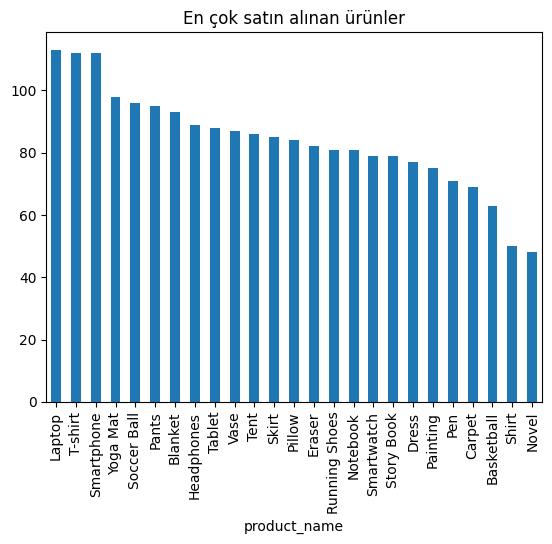

In [35]:
# En çok satın alınan ürünler neler?
top_products = df.groupby("product_name")["quantity"].sum().sort_values(ascending=False)
print(top_products)
top_products.plot(kind="bar", title="En çok satın alınan ürünler");

In [36]:
# En yüksek cirolu şehir hangisi?
df["total_price"] = df["quantity"] * df["price"]
top_cities = df.groupby("city")["total_price"].sum().sort_values(ascending = False)
print(top_cities)

city
Port Melissaborough    3941.29
Brownbury              2603.16
South Elizabeth        2581.12
Jenniferville          2434.50
Port Paul              2382.65
                        ...   
Anthonyport              34.64
Gonzalezshire            27.65
Williamton               22.21
North Diane              21.44
Jonathanstad             20.84
Name: total_price, Length: 701, dtype: float64


In [37]:
# Ortalama ürün fiyatı nedir?
avg_product = df.groupby("product_name")["price"].mean().sort_values(ascending=False)
print(avg_product)

product_name
Notebook         301.833103
Tablet           297.773214
Basketball       292.077600
Smartwatch       285.739655
Yoga Mat         281.816286
Painting         277.432857
Story Book       276.218750
Pen              273.134138
Headphones       270.585161
Soccer Ball      270.328750
Skirt            268.696071
Dress            267.009615
Laptop           266.170000
Pants            259.036857
Shirt            256.518333
Novel            250.703333
Smartphone       240.876857
Blanket          239.514545
Pillow           238.677308
Carpet           236.709630
Eraser           228.436452
Vase             228.380370
Tent             217.148966
T-shirt          210.728788
Running Shoes    195.450000
Name: price, dtype: float64


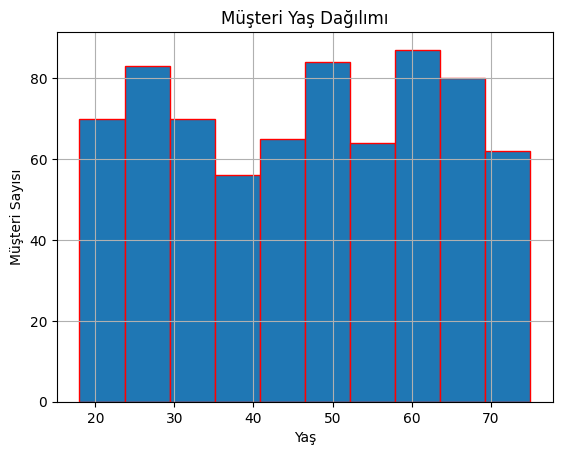

In [38]:
# Müşterilerin yaş dağılımı nasıldır ?
plt.hist(df["age"],bins=10,edgecolor="red")
plt.title('Müşteri Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Müşteri Sayısı')
plt.grid(True)
plt.show()

### Prepearing for Costumer Segmentation

In [39]:
age_bins = [18, 25, 35, 50, 100]
labels = ["18-25","26-35","36-50","51+"]
# Yaşları bu gruplara ayırma işlemi
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=labels, right=False)

age_segment_counts = df['age_group'].value_counts()
print(age_segment_counts)

age_group
51+      331
36-50    178
26-35    129
18-25     83
Name: count, dtype: int64


age_group
18-25    4.144578
26-35    3.883721
36-50    4.028090
51+      3.942598
Name: review_score, dtype: float64


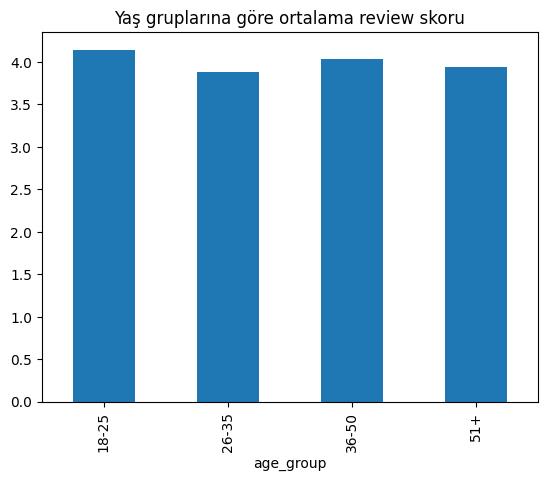

In [40]:
# Yaş gruplarına göre ortalama review skoru

age_segment_and_review = df.groupby("age_group")["review_score"].mean()
print(age_segment_and_review)
age_segment_and_review.plot(kind="bar", title="Yaş gruplarına göre ortalama review skoru");

age_group
18-25    680.439277
26-35    754.092481
36-50    741.161011
51+      754.159094
Name: total_price, dtype: float64


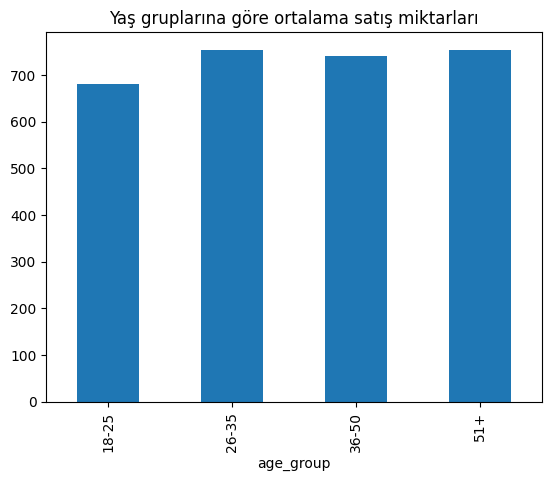

In [41]:
# Yaş gruplarına göre ortalama satış miktarları    

avg_age_segment_and_totalprice = df.groupby("age_group")["total_price"].mean()
print(avg_age_segment_and_totalprice)
avg_age_segment_and_totalprice.plot(kind="bar",title="Yaş gruplarına göre ortalama satış miktarları");

## Prediction of review score

In [21]:
print(df.columns)

Index(['customer_id', 'order_date', 'product_id', 'category_id',
       'category_name', 'product_name', 'quantity', 'price', 'payment_method',
       'city', 'review_score', 'gender', 'age', 'total_price', 'age_group'],
      dtype='object')


In [42]:
df_for_rfr = df.copy()

In [45]:
df_for_rfr = df_for_rfr.drop(["customer_id","order_date","product_id","category_id","category_name","quantity","price","gender","total_price","age_group"],axis=True)

In [46]:
df_for_rfr.columns

Index(['product_name', 'payment_method', 'city', 'review_score', 'age'], dtype='object')

In [50]:
from sklearn.model_selection import train_test_split
# Kategorik veriler için One-Hot Encoding uygulama
df_encoded = pd.get_dummies(df_for_rfr, columns=['product_name', 'city', 'payment_method'])

# Model için feature (X) ve hedef (Y) oluşturma
X = df_encoded.drop('review_score', axis=1)  # 'price' hedef değişken olarak alınacak
Y = df_encoded['review_score']  # 'price' hedef değişkeni
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [54]:
# Test verisiyle tahmin yap
y_pred = rf.predict(X_test)

# Modeli değerlendirmek için R2 skoru kullanabiliriz
from sklearn.metrics import mean_squared_error, r2_score

# Hata hesapla
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 2.5124275862068965
R2 Score: -0.4373820408163267
